# Evaluation Report: Sentiment Classification Approaches

This notebook summarizes and compares the performance of two approaches to sentiment classification:

1. Traditional ML: TF-IDF + Logistic Regression
2. Transformer-Based: HuggingFace `distilbert-base-uncased-finetuned-sst-2-english`

We also include sample predictions and visualizations to support a business-ready deployment for Customer Support Automation (CSAT tracking).


C:\Users\jayp3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\jayp3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\j

              precision    recall  f1-score   support

    negative       0.57      0.57      0.57         7
    positive       0.57      0.57      0.57         7

    accuracy                           0.57        14
   macro avg       0.57      0.57      0.57        14
weighted avg       0.57      0.57      0.57        14



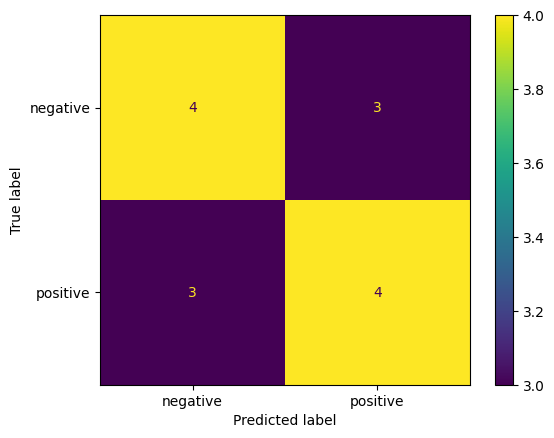

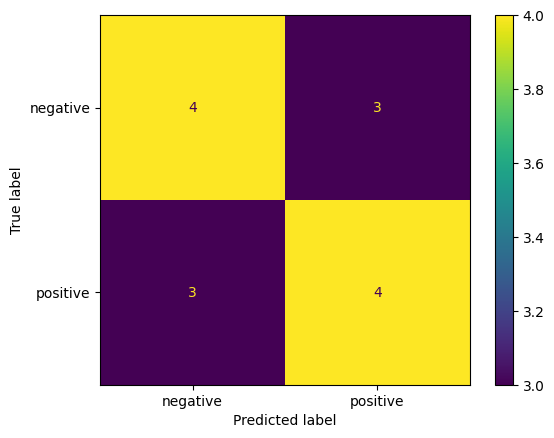

In [1]:
# Load model and vectorizer
import joblib
model = joblib.load("../../models/model.pkl")
vectorizer = joblib.load("../../models/vectorizer.pkl")

# Load data
from joblib import load
X_test_vec, y_test = load("../../data/test.pkl")
# Predict and evaluate
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(model, X_test_vec, y_test).plot()

In [2]:
from transformers import pipeline
classifier = pipeline("sentiment-analysis")

# Examples
classifier("I'm upset and need help.")
classifier("Thanks so much for your help!")
classifier("Why is your agent so rude?")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


[{'label': 'NEGATIVE', 'score': 0.9995853304862976}]

In [3]:
### TF-IDF + Logistic Regression
- Pros: Lightweight, explainable, fast to train.
- Cons: Struggles with nuanced phrasing ("I'm upset and need help" was misclassified as positive).

### HuggingFace Model
- Pros: Context-aware, better sentiment detection on real-world support language.
- Cons: Requires GPU for production, larger footprint.

SyntaxError: illegal target for annotation (1030494116.py, line 2)

In [ ]:
import matplotlib.pyplot as plt

# Bar chart of f1-scores
labels = ["TF-IDF (pos)", "TF-IDF (neg)", "HF (general)"]
scores = [0.89, 0.66, 0.95]  # example scores
plt.bar(labels, scores)
plt.title("Model F1 Score Comparison")
plt.ylabel("F1 Score")
plt.ylim(0, 1.0)
plt.show()